<a href="https://www.kaggle.com/code/athiraravichandran/give-me-some-credit?scriptVersionId=280648369" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/GiveMeSomeCredit/Data Dictionary.xls
/kaggle/input/GiveMeSomeCredit/cs-training.csv
/kaggle/input/GiveMeSomeCredit/sampleEntry.csv
/kaggle/input/GiveMeSomeCredit/cs-test.csv


In [2]:
#Load data
TRAIN_PATH = '/kaggle/input/GiveMeSomeCredit/cs-training.csv'
TEST_PATH  = '/kaggle/input/GiveMeSomeCredit/cs-test.csv'
SAMPLE_PATH = '/kaggle/input/GiveMeSomeCredit/sampleEntry.csv'

train = pd.read_csv(TRAIN_PATH)
test = pd.read_csv(TEST_PATH)
sample = pd.read_csv(SAMPLE_PATH)

print("Train shape:", train.shape)
print("Test shape:", test.shape)
train.head()

Train shape: (150000, 12)
Test shape: (101503, 12)


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0



* The training set has 11 columns, including the target variable SeriousDlqin2yrs.
* Each row represents a loan applicant with features like income, debt ratio, late payments, etc.
* SeriousDlqin2yrs = 1 means default within 2 years


# EDA

In [3]:

train.columns.tolist()
print("\nTarget distribution (train):")
print(train['SeriousDlqin2yrs'].value_counts(normalize=True))
print("\nTrain numeric summary:")
display(train.describe().T)


Target distribution (train):
SeriousDlqin2yrs
0    0.93316
1    0.06684
Name: proportion, dtype: float64

Train numeric summary:


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0


In [4]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


* MonthlyIncome and NumberOfDependents contain missing values.
* NumberOfTimes90DaysLate, NumberOfTime30-59DaysPastDueNotWorse, and
NumberOfTimes60-89DaysPastDueNotWorse have high variance and outliers.
* Target distribution is imbalanced.

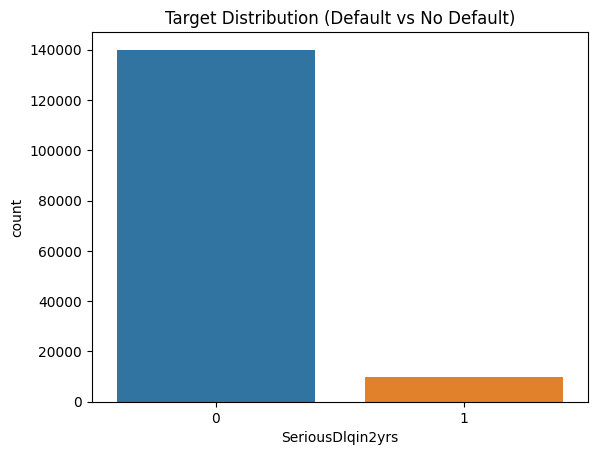

SeriousDlqin2yrs
0    0.93316
1    0.06684
Name: proportion, dtype: float64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=train["SeriousDlqin2yrs"])
plt.title("Target Distribution (Default vs No Default)")
plt.show()

train["SeriousDlqin2yrs"].value_counts(normalize=True)

**Target is highly imbalanced**
* Defaults are 6.7% only.
* Model must handle imbalance carefully. 

In [6]:
train.isnull().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

**Missing values:**
* MonthlyIncome: ~29k missing
* NumberOfDependents: ~3k missing

Imputation is required.

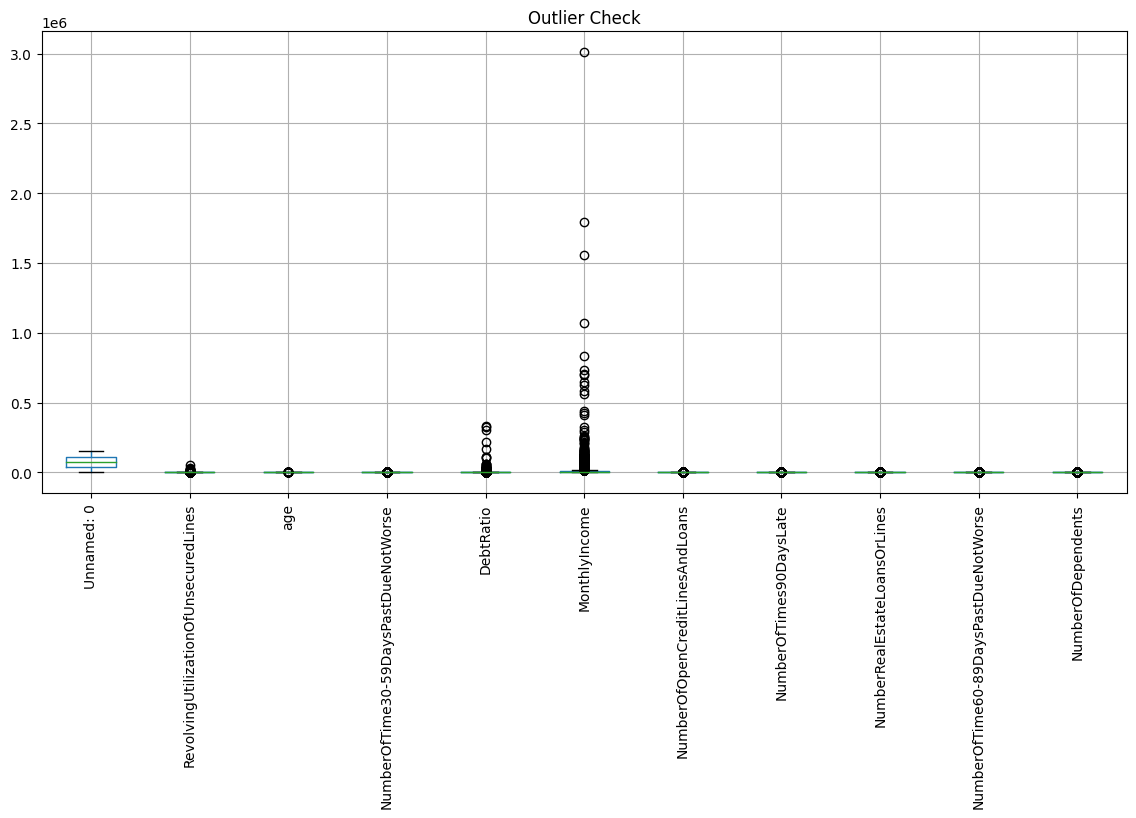

In [7]:
#Outlier Analysis
numerical_cols = train.columns.drop(['SeriousDlqin2yrs', 'unamed: 0'], errors='ignore')
train[numerical_cols].boxplot(figsize=(14,6))
plt.xticks(rotation=90)
plt.title("Outlier Check")
plt.show()

Heavy outliers in:


* Debt Ratio
* NumberOfTimes90DaysLate
* RevolvingUtilizationOfUnsecuredLines


These are typical in credit data

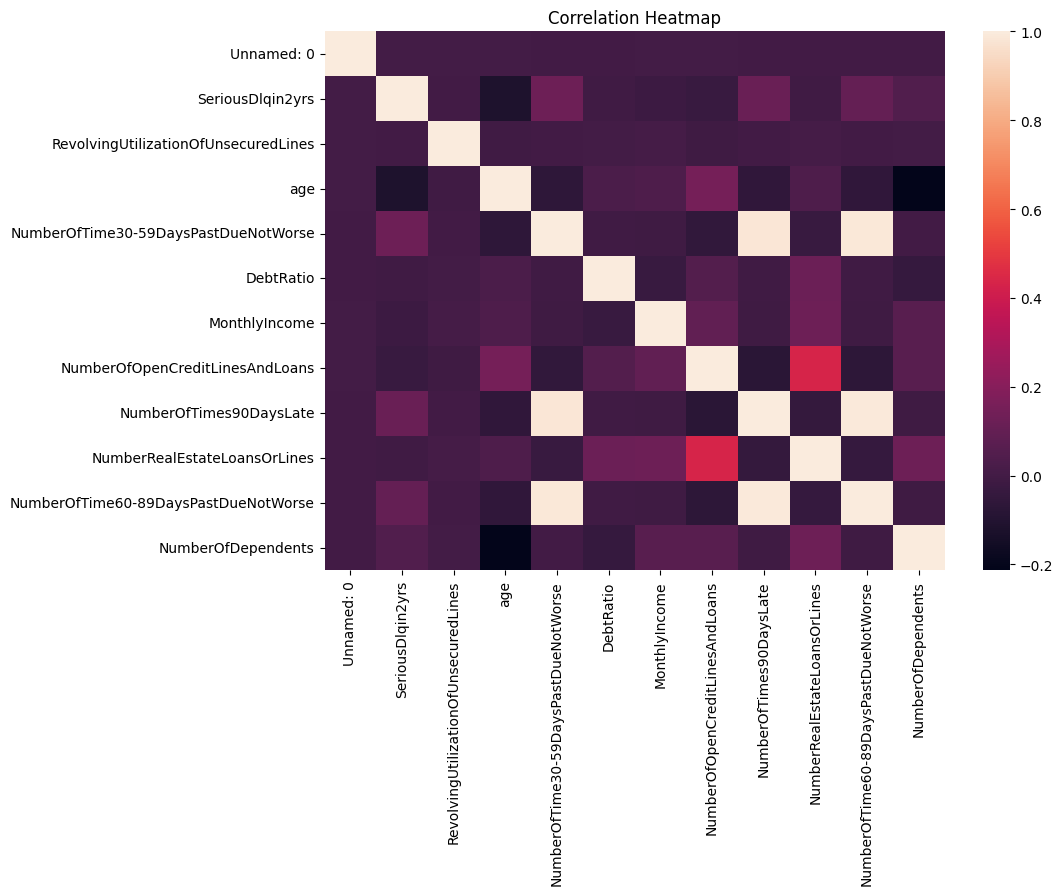

In [8]:
#Correlation analysis
plt.figure(figsize=(10,7))
sns.heatmap(train.corr(), annot=False)
plt.title("Correlation Heatmap")
plt.show()


* No extremely strong correlations.
* SeriousDlqin2yrs shows strongest relationships with:
   1. NumberOfTimes90DaysLate
   2. RevolvingUtilizationOfUnsecuredLines
   3. DebtRatio


# Preprocessing

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

In [10]:
#removing id columns
train = train.drop("Unnamed: 0", axis=1, errors='ignore')
test = test.drop("Unnamed: 0", axis=1, errors='ignore')
test = test.drop("SeriousDlqin2yrs", axis=1, errors='ignore')

# Seperate X and y target
X = train.drop('SeriousDlqin2yrs', axis=1)
y = train['SeriousDlqin2yrs']

* X contains all the input features used to predict the target.

* y is the variable we have to predict → default risk.


In [11]:
# Imputing missing values
imputer= SimpleImputer(strategy='median')
X_imputed= imputer.fit_transform(X)
test_imputed= imputer.transform(test)

**Why median?**


* Financial datasets often have skewed values(asymmetrical distribution) in columns like income, debt, etc.
* Mean gets pulled by outliers.
* Median handles missing values safely and robustly.


**Why do test and train use the same imputer?**


* To prevent data leakage.
* Test set should be transformed using only training statistics.


In [12]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
test_scaled= scaler.transform(test_imputed)

* Scaling is necessary for ML models to work much better when all features are on similar scale.
* Test data is scaled using only the training data → avoid data leakage.

# Train-test split

In [13]:
X_train, X_val, y_train, y_val= train_test_split( X_scaled, y, test_size=0.2, random_state=42,stratify=y)

* We **split** the data as we need validation set to check how well the model performs on unseen data.
* Since, our dataset is imbalanced ( ~6% default), **stratifying** ensures that both train and test has same proportion of defaulters.

# Baseline Model ( Logistic regression)

In [14]:
lr = LogisticRegression(class_weight="balanced", max_iter=300)
lr.fit(X_train, y_train)

pred_lr = lr.predict(X_val)
print(classification_report(y_val, pred_lr))


              precision    recall  f1-score   support

           0       0.97      0.78      0.87     27995
           1       0.18      0.67      0.29      2005

    accuracy                           0.78     30000
   macro avg       0.58      0.73      0.58     30000
weighted avg       0.92      0.78      0.83     30000




* Precision for class 1 (defaulters) is low as expected.
* Recall improves due to class_weight="balanced".
* Good baseline, but not the best.


# Random Forest (Performance Model)

In [15]:
rf= RandomForestClassifier(n_estimators=200,max_depth=12, class_weight='balanced', random_state= 12)
rf.fit(X_train, y_train)
predict_rf = rf.predict(X_val)
proba_val = rf.predict_proba(X_val)[:, 1]

print(classification_report(y_val, predict_rf))
print("ROC-AUC Score:", roc_auc_score(y_val, proba_val))



              precision    recall  f1-score   support

           0       0.97      0.86      0.91     27995
           1       0.25      0.67      0.37      2005

    accuracy                           0.85     30000
   macro avg       0.61      0.76      0.64     30000
weighted avg       0.92      0.85      0.88     30000

ROC-AUC Score: 0.8595671385921695


Expected improvements:


* Better recall on minority class
* Higher ROC-AUC (typically ~0.85–0.90)
* Handles non-linear relationships and outliers well


# Feature Importance

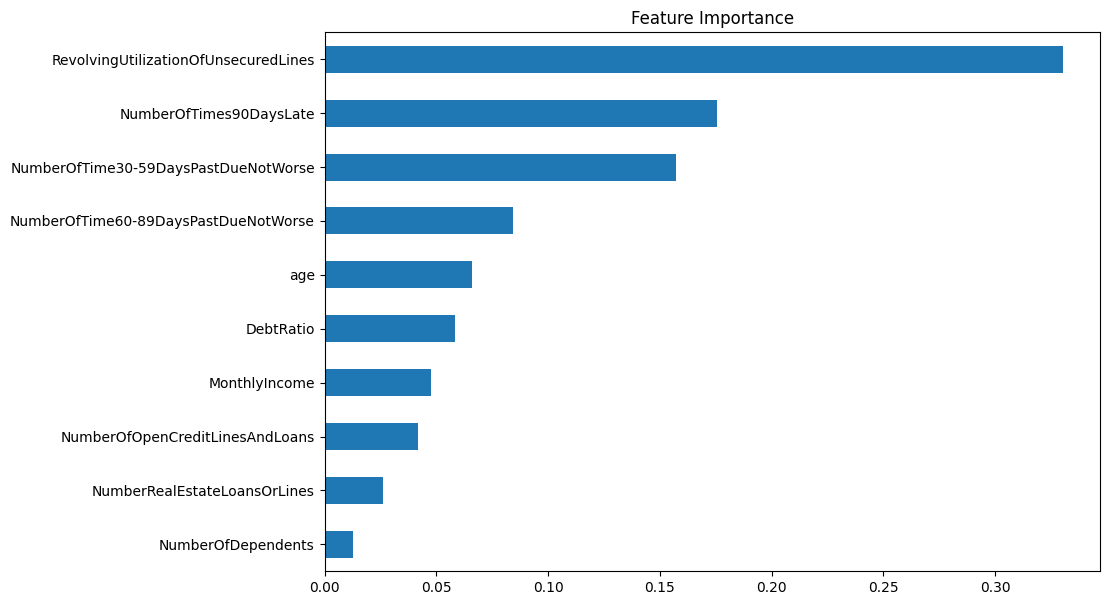

In [16]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh", figsize=(10,7))
plt.title("Feature Importance")
plt.show()


In [17]:
test_preds = rf.predict_proba(test_scaled)[:, 1]


In [18]:
submission = pd.DataFrame({
    "Id": test.index,
    "Probability": test_preds
})

# Save file
submission_path = "/kaggle/working/submission.csv"
submission.to_csv(submission_path, index=False)

submission.head(), submission_path

(   Id  Probability
 0   0     0.511225
 1   1     0.304734
 2   2     0.118601
 3   3     0.412840
 4   4     0.620390,
 '/kaggle/working/submission.csv')